In [45]:

# import necessary libraries
import pandas as pd
import numpy as np

In [62]:
# Load the data
data_path = 'C:/Users/Piyush/OneDrive/Documents/adm_project/online+retail+ii/online_retail_II.xlsx'
data = pd.read_excel(data_path)

# Display the first few rows of the dataset to ensure it's loaded correctly
data.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
# getting some information about thye dataset
data.drop(columns=['InvoiceDate'],axis=1)

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,3.75,17530.0,United Kingdom


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [48]:
'''Categorical Features:
   -Invoice
   -StockCode
   -Description
   -Country
   Numerical Features:
   -Quantity
   -Price 
   -Customer ID
   -InvoiceDate   
   TimeStamp:
   -InvoiceDate'''

'Categorical Features:\n   -Invoice\n   -StockCode\n   -Description\n   -Country\n   Numerical Features:\n   -Quantity\n   -Price \n   -Customer ID\n   -InvoiceDate   \n   TimeStamp:\n   -InvoiceDate'

In [49]:
# checking for missing values
data.isna().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [50]:
data['Customer ID'].mean()

15360.645477973052

In [51]:
# filling the missing values in "Item_weight column" with "Mean" value
data['Customer ID'].fillna(data['Customer ID'].mean(), inplace=True)

In [52]:
data.isna().sum()

Invoice           0
StockCode         0
Description    2928
Quantity          0
InvoiceDate       0
Price             0
Customer ID       0
Country           0
dtype: int64

In [53]:
from sklearn.impute import SimpleImputer
data=pd.DataFrame(SimpleImputer(strategy="most_frequent").fit_transform(data))
print(data.isna().sum())

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64


In [54]:
#convert mixed data to string
for i in [0,1,2]:
    data[i] = data[i].astype(str)

In [55]:
from sklearn.preprocessing import LabelEncoder
for i in [0,1,2,4,7]:    
    data[i]=LabelEncoder().fit_transform(data[i])
print(data.head())

   0     1     2   3  4     5        6   7
0  0  3892    55  12  0  6.95  13085.0  37
1  0  3052  2920  12  0  6.75  13085.0  37
2  0  3054    27  12  0  6.75  13085.0  37
3  0  1393  3236  48  0   2.1  13085.0  37
4  0   708  4067  24  0  1.25  13085.0  37


In [56]:
#spliting the data
target=data[7]
data1 = data.drop(columns=[7])
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(data1,target,test_size=0.3)
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape) 

(367822, 7) (367822,) (157639, 7) (157639,)


In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [58]:
data.head()

,0,1,2,3,4,5,6,7
0,0,3892,55,12,0,6.95,13085.0,37
1,0,3052,2920,12,0,6.75,13085.0,37
2,0,3054,27,12,0,6.75,13085.0,37
3,0,1393,3236,48,0,2.1,13085.0,37
4,0,708,4067,24,0,1.25,13085.0,37


In [33]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
model_1=LogisticRegression(max_iter=1000)
model_1.fit(xtrain,ytrain)
from sklearn.metrics import accuracy_score
pred_train=model_1.predict(xtrain)
pred_test=model_1.predict(xtest)
print("training accuracy is ",accuracy_score(pred_train,ytrain))
print("testing accuracy is ",accuracy_score(pred_test,ytest))

training accuracy is  0.9311541995856691
testing accuracy is  0.9323327349196582


In [31]:
#applying decision tree
from sklearn.tree import DecisionTreeClassifier
model_2=DecisionTreeClassifier(criterion="entropy", max_depth=2)
model_2.fit(xtrain,ytrain)
from sklearn.metrics import accuracy_score
pred_train=model_2.predict(xtrain)
pred_test=model_2.predict(xtest)
print("training accuracy is ",accuracy_score(pred_train,ytrain))
print("testing accuracy is ",accuracy_score(pred_test,ytest))

training accuracy is  0.9409143553131678
testing accuracy is  0.9419369572250522


In [32]:
#applying Perceptron 
from sklearn.linear_model import Perceptron
model_3=Perceptron()
model_3.fit(xtrain,ytrain)
pred_train=model_3.predict(xtrain)
pred_test=model_3.predict(xtest)
print("training accuracy is ",accuracy_score(pred_train,ytrain))
print("testing accuracy is ",accuracy_score(pred_test,ytest))

training accuracy is  0.9182403445144662
testing accuracy is  0.9193093079758181


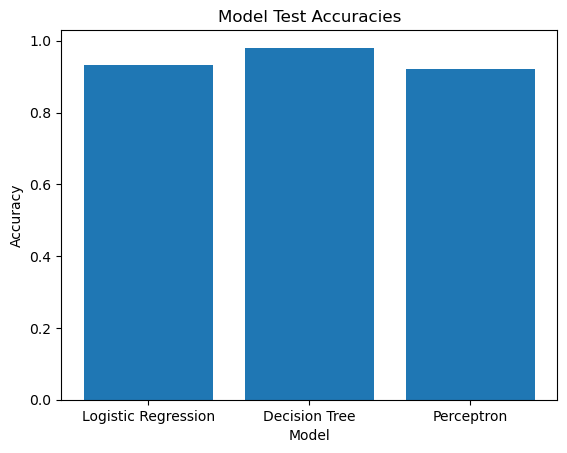

In [39]:
import matplotlib.pyplot as plt

# Define the model names and their corresponding test accuracy scores
models = ['Logistic Regression', 'Decision Tree', 'Perceptron']
accuracies = [0.9315080658973985, 0.98051878025108, 0.9202354747238944]

# Create a bar chart
plt.bar(models, accuracies)

# Add chart title and axis labels
plt.title('Model Test Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Display the chart
plt.show()

Mean Squared Error: 1807288689.5555131
R-squared: 0.5148943734991231


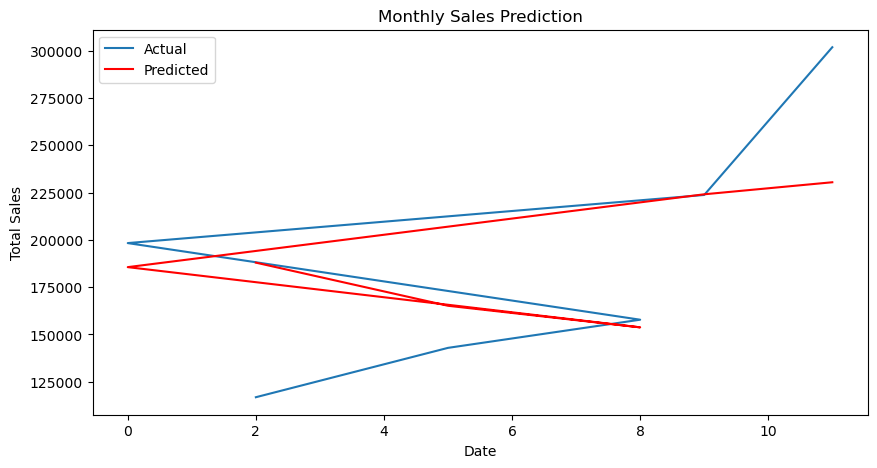

In [75]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and it includes 'InvoiceDate' and 'Price'

# Convert InvoiceDate to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Creating a new DataFrame to aggregate sales data by month
data_monthly_sales = data.groupby(pd.Grouper(key='InvoiceDate', freq='M')).agg(total_sales=('Price', 'sum')).reset_index()

# Feature Engineering: Create year and month columns for modeling
data_monthly_sales['year'] = data_monthly_sales['InvoiceDate'].dt.year
data_monthly_sales['month'] = data_monthly_sales['InvoiceDate'].dt.month

# Prepare data for Random Forest
X = data_monthly_sales[['year', 'month']]
y = data_monthly_sales['total_sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and print the mean squared error and the R-squared value of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted', color='red')
plt.title('Monthly Sales Prediction')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()


Mean Squared Error: 1807288689.5555131
R-squared: 0.5148943734991231
MAPE (Mean Absolute Percentage Error): 18.22%


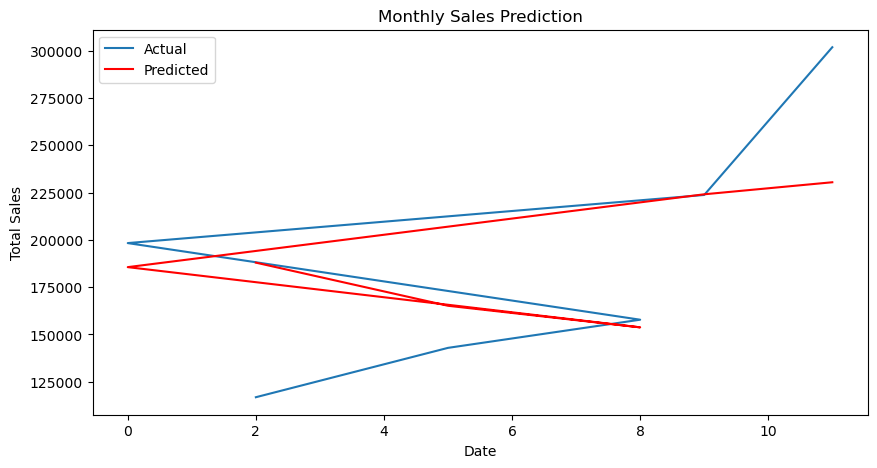

In [74]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and it includes 'InvoiceDate' and 'Price'

# Convert InvoiceDate to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Creating a new DataFrame to aggregate sales data by month
data_monthly_sales = data.groupby(pd.Grouper(key='InvoiceDate', freq='M')).agg(total_sales=('Price', 'sum')).reset_index()

# Feature Engineering: Create year and month columns for modeling
data_monthly_sales['year'] = data_monthly_sales['InvoiceDate'].dt.year
data_monthly_sales['month'] = data_monthly_sales['InvoiceDate'].dt.month

# Prepare data for Random Forest
X = data_monthly_sales[['year', 'month']]
y = data_monthly_sales['total_sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'MAPE (Mean Absolute Percentage Error): {mape:.2f}%')

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted', color='red')
plt.title('Monthly Sales Prediction')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()
